In [90]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

In [91]:
numSamples = 204

base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
dataset = pd.read_csv(base_dir+'\_data\dataset.csv', header=None)

data_arr = dataset.to_numpy()
data_arr = data_arr.reshape(15, 204)
data_arr = data_arr.T

new_dataset = pd.DataFrame(data_arr, columns=['Patient', 'Direction', 'Magnitude', 'Cz_1', 'Cz_2',
                                           'Cz_3', 'Cz_4', 'Agonist_1', 'Agonist_2', 'Agonist_3', 
                                           'Agonist_4', 'Agonist_5', 'Agonist_6', 'Agonist_7', 'Agonist_8'])
new_dataset.to_csv(base_dir+'\_data\\transformed_dataset.csv')

### Extract the Inputs and Outputs of the Model

In [92]:
input = new_dataset.drop(new_dataset.columns[[0,1,2,7,8,9,10,11,12,13,14]], axis = 1)
input_arr = input.to_numpy()

output = new_dataset.iloc(axis=1)[7:15]
output_arr = output.to_numpy()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_arr, output_arr, test_size=0.3, train_size=0.7)

### Complete PCA and find Principal Components

In [93]:
def runPCA(trainData, testData, components):
    scaling = StandardScaler()
    scaled_train = scaling.fit_transform(trainData)
    scaled_test = scaling.transform(testData)

    principal_comp = PCA(n_components=components)
    x_train = principal_comp.fit_transform(scaled_train)
    x_test = principal_comp.transform(scaled_test) ##transformed dataset

    return x_train, x_test, principal_comp, scaling

##PCA with Input Features
input_pca = runPCA(Xtrain, Xtest, 2)
x_train = input_pca[0]
x_test = input_pca[1]
print("X = \n", "Training= \n", x_train, "\n Testing= \n", x_test)
# print(x.shape)
pca_in = input_pca[2]
# scale = input_pca[3]
# print(pca_in, scale)

X = 
 Training= 
 [[-1.08715715e+00 -4.44652059e-01]
 [ 1.06198237e-01 -8.44034624e-01]
 [ 6.71668452e-01 -8.51596904e-01]
 [ 2.45652652e+00  2.19343027e+00]
 [-1.21281439e+00 -6.19899010e-01]
 [-9.82625969e-01 -1.01115449e-01]
 [ 1.63012742e+00 -1.12695911e+00]
 [ 1.42124984e+00 -9.18214787e-01]
 [-4.27229463e-01 -3.60623864e-01]
 [ 5.45856000e-01 -8.94686370e-01]
 [-4.20886748e-01 -6.44745039e-01]
 [-3.47897167e-01 -4.69227928e-01]
 [-3.92332546e-01 -3.32048132e-01]
 [-3.06743022e-01 -3.60862686e-01]
 [ 2.93168531e-01 -5.28173438e-01]
 [-1.10959341e+00 -4.39004870e-01]
 [-5.26689842e-01  6.88937948e-01]
 [-1.63015739e-01 -1.77215893e-01]
 [-1.10769404e+00 -3.36803752e-01]
 [-1.63224223e-01 -3.80224864e-01]
 [ 1.06887311e+00 -6.77842546e-01]
 [-6.70560305e-01 -1.65444032e-01]
 [ 2.99104837e-01 -4.26316301e-01]
 [-3.04698936e+00  1.54772863e+00]
 [-8.76891340e-01  5.20078927e-01]
 [-1.42152700e-01 -2.91551534e-01]
 [-2.50988559e-02 -4.28519974e-01]
 [-5.47860962e-03 -4.27439341e-01]
 [

In [94]:
##PCA with Output Features
output_pca = runPCA(Ytrain, Ytest, 2)
y_train = output_pca[0]
y_test = output_pca[1]
print("Y = \n", "Training= \n", y_train, "\n Testing= \n", y_test)
# print(x.shape)
pca_out = output_pca[2]

Y = 
 Training= 
 [[-1.55933844e+00  1.64000946e+00]
 [ 9.96856782e-01  2.60039067e-01]
 [ 5.01211263e-01 -7.66885309e-01]
 [ 1.62225450e+00  5.08876674e-01]
 [-9.24724620e-01 -2.13670115e-01]
 [ 7.49856317e-01  3.99947990e-01]
 [ 2.39284538e+00  9.93638429e-01]
 [-9.05696271e-01  8.06510211e-01]
 [-5.96171969e-02  1.79035402e+00]
 [-6.93967693e-01  2.65435169e-01]
 [-1.86200091e-01  9.76205047e-01]
 [-1.69604185e+00 -1.67220598e-01]
 [-1.16043586e+00  1.28189858e+00]
 [-1.09935294e+00  2.12104589e+00]
 [-6.40574686e-01  1.74329852e-01]
 [-8.72375885e-01  2.39905173e-01]
 [-1.93910224e+00  1.70651241e-01]
 [-3.10290395e-01  6.28793863e-01]
 [ 1.89556393e-01 -4.30400653e-01]
 [ 4.81721967e-01 -2.55697066e+00]
 [ 2.37438730e-01  1.04473987e+00]
 [-5.56122906e-01 -1.68333378e-01]
 [ 4.39793756e+00 -3.35347337e+00]
 [-8.59426361e-01  1.63934905e+00]
 [-6.99623184e-01 -4.32454206e-01]
 [ 4.24680401e-01  3.09958319e-01]
 [ 9.59263661e-01 -1.43745950e+00]
 [ 5.72321081e-01  2.34674609e-01]
 [

### Metrics and Principal Components

In [95]:
def getMetrics(principal):
    print("Principal Components = \n", principal.components_)
    print("Variance Ratio = \n", principal.explained_variance_ratio_)
print("Input (X):")
getMetrics(pca_in)
print("\nOutput (Y):")
getMetrics(pca_out)

Input (X):
Principal Components = 
 [[ 0.55317889  0.61722225  0.26501386  0.49274483]
 [ 0.08272751 -0.05473425  0.86601364 -0.49008233]]
Variance Ratio = 
 [0.43061972 0.25128243]

Output (Y):
Principal Components = 
 [[ 0.53317436  0.16654742 -0.22105798  0.3685284   0.62650006 -0.07002049
  -0.11529702  0.3043167 ]
 [ 0.34156652  0.46745273  0.2711307  -0.42055763  0.18252237 -0.17242187
   0.44066649 -0.39649591]]
Variance Ratio = 
 [0.22654538 0.20593737]


### Generate Plots

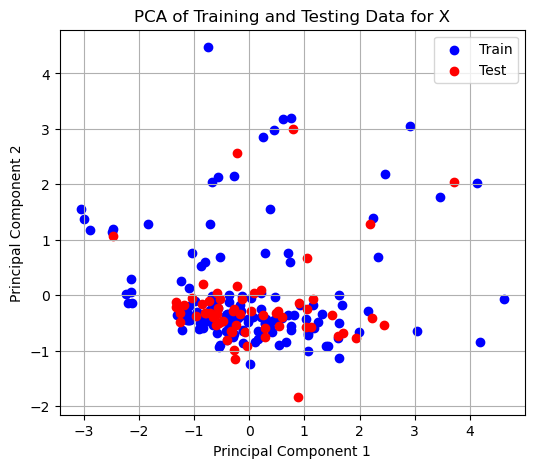

In [96]:
xplot_pca = plt.figure(figsize=(6, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c='blue', label='Train')
plt.scatter(x_test[:, 0], x_test[:, 1], c='red', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training and Testing Data for X')
plt.legend()
plt.grid(True)
plt.show()

xplot_pca.savefig(base_dir + "/_images/PCA_X.jpg")

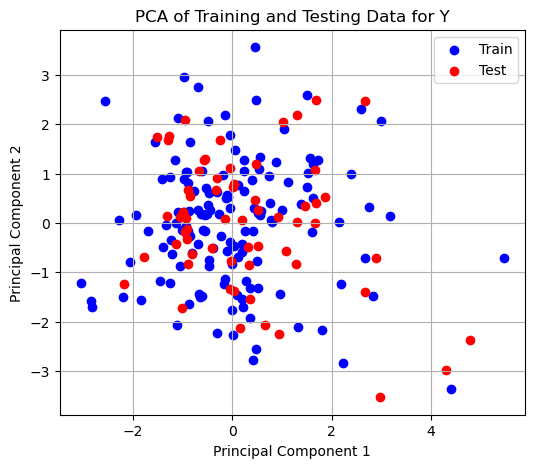

In [97]:
yplot_pca = plt.figure(figsize=(6, 5))
plt.scatter(y_train[:, 0], y_train[:, 1], c='blue', label='Train')
plt.scatter(y_test[:, 0], y_test[:, 1], c='red', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training and Testing Data for Y')
plt.legend()
plt.grid(True)
plt.show()

yplot_pca.savefig(base_dir + "/_images/PCA_Y.jpg")